<a href="https://colab.research.google.com/github/ppunkz/CE888_DS/blob/master/Lab2/Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
		bootstrap_sample = np.random.choice(sample, size=(n_iterations,sample_size) , replace = True)
		mean_array = np.mean(bootstrap_sample, axis=1)
		data_mean = np.mean(mean_array)
		lower, upper = np.percentile(mean_array, [5, 95])
		#lower = np.percentile(mean_array, 5)
		#upper = np.percentile(mean_array, 95)
		return data_mean, lower, upper


(0, 100000)

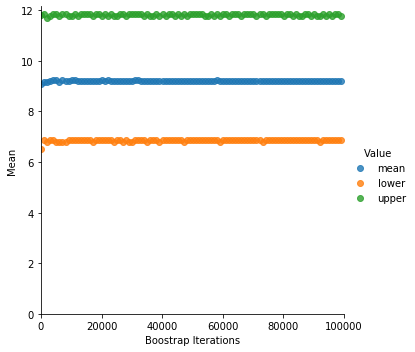

In [55]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	bootstrap_sample = np.random.choice(sample, size=(iterations,sample_size) , replace = True)
	mean_array = np.mean(bootstrap_sample, axis=1)
	data_mean = np.mean(mean_array)
	#lower, upper = np.percentile(mean_array, [100-ci, ci])
	lower = np.percentile(mean_array, 100-ci)
	upper = np.percentile(mean_array, ci)
	return data_mean, lower, upper

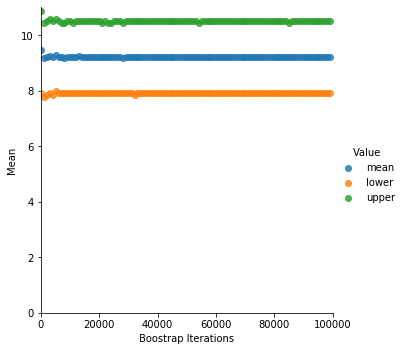

In [63]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


     Current fleet  New Fleet  index
0               18       24.0      0
1               15       27.0      1
2               18       27.0      2
3               16       25.0      3
4               17       31.0      4
..             ...        ...    ...
244             27        NaN    244
245             27        NaN    245
246             32        NaN    246
247             28        NaN    247
248             31        NaN    248

[249 rows x 3 columns]


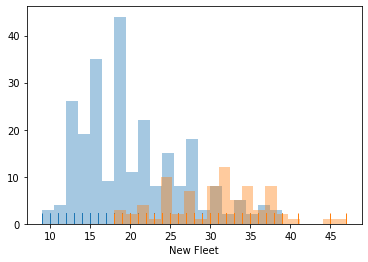

In [138]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df['index']=df.index
print(df)
current_fleet = df.iloc[:,0]
new_fleet = df.iloc[:,1]
new_fleet = new_fleet[~np.isnan(new_fleet)]

sns.distplot(current_fleet, bins=20, kde=False, rug=True)
sns.distplot(new_fleet, bins=20, kde=False, rug=True)


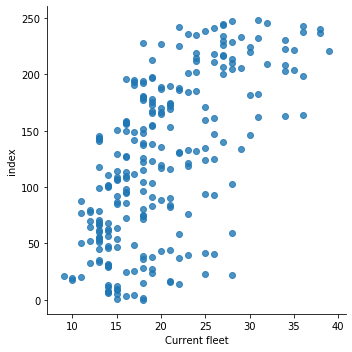

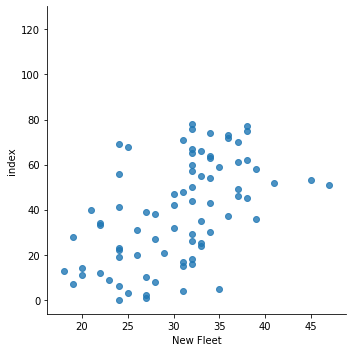

In [105]:
sns.lmplot(df.columns[0], df.columns[2],df,  fit_reg=False)
sns.lmplot(df.columns[1], df.columns[2],df,  fit_reg=False)

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

In [124]:
current_mean, current_lower, current_upper = boostrap_mean_ci(current_fleet, current_fleet.shape[0], 1000, 95)
print('Current_mean', current_mean)
print('Current_lower', current_lower)
print('Current_upper', current_upper)
new_mean, new_lower, new_upper = boostrap_mean_ci(new_fleet, new_fleet.shape[0], 1000, 95)
print('New_mean', new_mean)
print('New_lower', new_lower)
print('New_upper', new_upper)

Current_mean 20.159220883534136
Current_lower 19.50602409638554
Current_upper 20.803815261044175
New_mean 30.468
New_lower 29.303164556962027
New_upper 31.620253164556964


In [126]:
tobs = new_mean - current_mean
print(tobs)

10.308779116465864


In [0]:
concat = np.concatenate((current_fleet,new_fleet))
perm = np.random.permutation(concat)

In [137]:
pold = perm[:int(len(perm)/2)]
pnew = perm[int(len(perm)/2):]
tperm = np.mean(pold) - np.mean(pnew)
print(tperm)

-1.3414634146341449
